In [13]:
from scipy.optimize import curve_fit
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

T=10000 
l=1000 #總長 1km吧?
dt=0.001
def f(l):
    return l[0]
#排序用的function 可不管

def prob(x):
    a=random.randint(1,10)
    if a<=x*10:
        return True
    else:
        return False
    # x的機率是true 1-x的機率是False
    

def normal(avg,var,c): #從Gaussian亂數抽樣 (抽出來一定大於零) 
   
    a=np.ndarray.tolist(np.random.normal(avg,var,3000)) #a是一個有normal分布的list
    
    a=list(filter(lambda x:x>c,a)) #濾掉小於等於c的
    
    s=random.sample(a,1) #從a裡面抽一個出來
    return s[0] #取出亂數


def ini(V_max,avg_d,avg_t,rho): #初始化道路的程式 
    S=[] #儲存初始state  [0]位置  [1]速度 [2]安全距離 [3]延遲時間
    n=int(rho*l) #車子數量由密度 道路長 所決定 初始的位置
    
    rad_x=random.sample(range(l),n)
    
    
    for i in range(n):
        S.append([rad_x[i],random.uniform(0,V_max),normal(avg_d,0.3*avg_d,0),normal(avg_t,0.1*avg_t,1)])
       

    S.sort(key=f)
    return S
def avg(x): #用來算list平均用的
    c=0
    for i in x:
        
        c+=i
            
    return c/len(x)


def rule(V_max,dx,car): #與前車距離 判斷的指標   Car 車子的狀態vector
    d=normal(car[2],0.5*car[2],0)
    dV=(V_max/2)*(np.tanh(dx-d)+np.tanh(d))
    t=normal(car[3],0.1*car[3],1)
    car[1]+=(1/t)*(dV-car[1])*dt
    if car[1]<0:
        car[1]=0
   
    
    
    
print("done5")




                       

done5


In [14]:
avgV=[] #個個時刻的平均速度

P=[] #所有時間所有狀態

t=[] #時間(長度和P一樣)
def traffic(V_max,avg_d,avg_t,rho):
    # V_max速度上限  avg_d 平均安全距離  avg_t 平均delay rho密度
    S=ini(V_max,avg_d,avg_t,rho)
    V=[] #計算平均速度用的
    
    for j in range(T):
        
        V1=[]
        #每個時段內發生的事
       
        for i in range(len(S)):
            x=len(S)-1
            t.append(j) 
            P.append(S[x-i][0])
           
            
        #每台車的狀況
            if i>0 :
                dx=S[x-i+1][0]-S[x-i][0] #前後車距
                rule(V_max,dx,S[x-i])
                    
                
                if S[x-i][1]<0 or dx<=0: #debug用的
                            
                    print(S[x-i][0],S[x-i][1],j,i)
                    break
                
            if i==0 : #最前面那台車的情形
                
                dx=S[0][0]-(S[x-i][0]-l)
                rule(V_max,dx,S[x-i])
                 
            
        
        for k in range(len(S)):
            S[k][0]+=S[k][1]*dt  #(4)更新車子的位置
                              
            V1.append(S[k][1])  #j時刻所有車的速度都丟進來
            
            
            if S[k][0]>l: 
                S[k][0]-=l
        S.sort(key=f)
               
         
        
        avgV.append(avg(V1)) #j時刻的平均速度
    #return len(S)  回傳車子的個數
print("dd")
"""     
P=[]
t=[]
a=traffic(10,5,2,0.3)
    #Vmax 安全距離 delay time 
plt.plot(avgV) """

dd


'     \nP=[]\nt=[]\na=traffic(10,5,2,0.3)\n    #Vmax 安全距離 delay time \nplt.plot(avgV) '

1
2
3
4
5
6
7
8
9


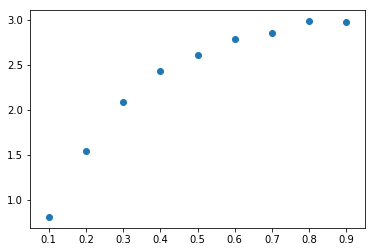

In [19]:
rho=[]
q=[]
for i in range(1,10,1):
    avgV=[] 
    P=[]
    t=[]
    print(i)
    traffic(10,1,1,i/10)
    v=[avgV[j] for j in range(9000,9100,100)] #取平衡之後的平均速度
    q.append(avg(v)*i/10)
    rho.append(i/10)

plt.scatter(rho,q)

1
2
3
4
5
6
7
8
9


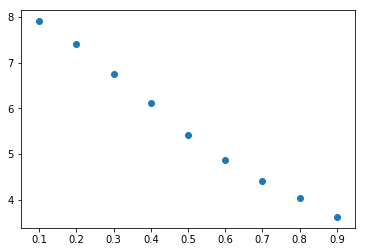

In [17]:
vv=[]
for i in range(len(q)):
    vv.append(q[i]*(10/(i+1)))
    print(i+1)
plt.scatter(rho,vv)

In [6]:
diff=[]
for i in range(len(q)-1):
    
    diff.append((q[i+1]-q[i])*10)

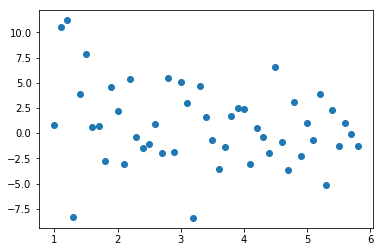

In [12]:
plt.scatter([i/10 for i in range(10,59,1)],diff)

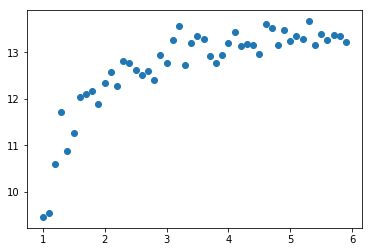

In [4]:
plt.scatter(rho,q)

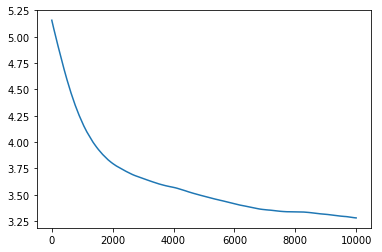

In [18]:
plt.plot(avgV)